### Sklearn 모델 추천 메서드 활용

- sklearn.utils 모듈의 all_estimators(type_filter)
    * type_filter 파라미터 : 'classifier', 'regressor' 지정
    * 반환 : 해당 타입의 모델 리스트 => 모델이름, 모델 객체

In [2]:
# 모듈 로딩 --------------------------------------------------
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.tree import plot_tree # 트리 시각화 함수
import matplotlib.pyplot as plt
from sklearn.utils import all_estimators
import numpy as np

### [1] 데이터 로딩 및 확인

In [3]:
# Bunch 데이터 타입 => dict와 유사한 형태
data = load_iris()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
# data, target => numpy 타입
# target_names ==> 라벨 --> setosa, versicolor
# feature_names ==> 컬럼명
input_data = data['data']
input_target = data['target']

### [2] 학습 데이터 분리 80:20

In [12]:
train_input, test_input, train_target, test_target = train_test_split(input_data, input_target,
                                                                     test_size= 0.2)

### [3] 학습
- 학습방법 선정 => 분류 / 회귀
    * 분류 => knn, LogisticRegression, DecisionTreeClassifier, SGDClassiFier, SVC...
    
    * 분류 모델 적용 후 결과 => all_estimators()

In [17]:
# 필터 타입에 해당하는 sklearn에 존재하는 모든 모델 이름과 객체 리스트로 반환
models = all_estimators(type_filter='classifier')

In [40]:
models

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('ClassifierChain', sklearn.multioutput.ClassifierChain),
 ('ComplementNB', sklearn.naive_bayes.ComplementNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('GaussianProcessClassifier',
  sklearn.gaussian_process._gpc.GaussianProcessClassifier),
 ('GradientBoostingClassifier',
  sklearn.ensemble._gb.GradientBoostingClassifier),
 ('HistGradientBoostingClassifier',
  sklearn.ensemble._hist_gradi

In [34]:
scores_train=[]
scores_test = []
for name, model in models:
    try:
        # 모델 객체 생성
        md = model()
        # 학습
        md.fit(train_input, train_target)
        # 평가
        scores_train.append(md.score(train_input, train_target))
        scores_test.append(md.score(test_input, test_target))
    except :
        pass

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

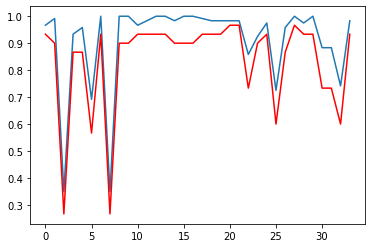

In [35]:
plt.plot(scores_train)
plt.plot(scores_test, color = 'red')
plt.show()

In [36]:
np.column_stack((scores_train, scores_test))

array([[0.96666667, 0.93333333],
       [0.99166667, 0.9       ],
       [0.35      , 0.26666667],
       [0.93333333, 0.86666667],
       [0.95833333, 0.86666667],
       [0.69166667, 0.56666667],
       [1.        , 0.93333333],
       [0.35      , 0.26666667],
       [1.        , 0.9       ],
       [1.        , 0.9       ],
       [0.96666667, 0.93333333],
       [0.98333333, 0.93333333],
       [1.        , 0.93333333],
       [1.        , 0.93333333],
       [0.98333333, 0.9       ],
       [1.        , 0.9       ],
       [1.        , 0.9       ],
       [0.99166667, 0.93333333],
       [0.98333333, 0.93333333],
       [0.98333333, 0.93333333],
       [0.98333333, 0.96666667],
       [0.98333333, 0.96666667],
       [0.85833333, 0.73333333],
       [0.925     , 0.9       ],
       [0.975     , 0.93333333],
       [0.725     , 0.6       ],
       [0.95833333, 0.86666667],
       [1.        , 0.96666667],
       [0.975     , 0.93333333],
       [1.        , 0.93333333],
       [0.

In [37]:
# 학습 - 검증용 데이터 셋
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target,
                                                                   test_size=0.2)